In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA

In [2]:
df = pd.read_csv('iris.csv')
iris = pd.read_csv('iris.csv')

In [3]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


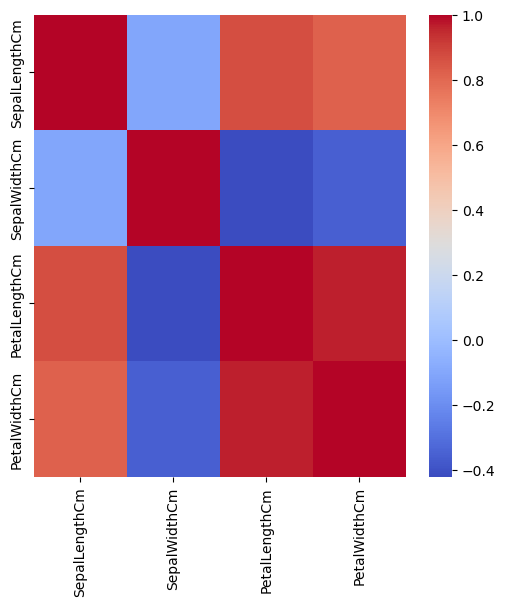

In [7]:
df_numeric = df.drop(columns=['Species','Id'])

plt.figure(figsize=(6,6))
sns.heatmap(df_numeric.corr(), cmap='coolwarm')
plt.show()

In [8]:
pca = PCA()
x_new = pca.fit_transform(iris.drop(['Species','Id'],axis = 1))
x_new[:5]

array([[-2.68420713e+00,  3.26607315e-01, -2.15118370e-02,
         1.00615724e-03],
       [-2.71539062e+00, -1.69556848e-01, -2.03521425e-01,
         9.96024240e-02],
       [-2.88981954e+00, -1.37345610e-01,  2.47092410e-02,
         1.93045428e-02],
       [-2.74643720e+00, -3.11124316e-01,  3.76719753e-02,
        -7.59552741e-02],
       [-2.72859298e+00,  3.33924564e-01,  9.62296998e-02,
        -6.31287327e-02]])

In [9]:
explained_variance = pca.explained_variance_ratio_
explained_variance

array([0.92461621, 0.05301557, 0.01718514, 0.00518309])

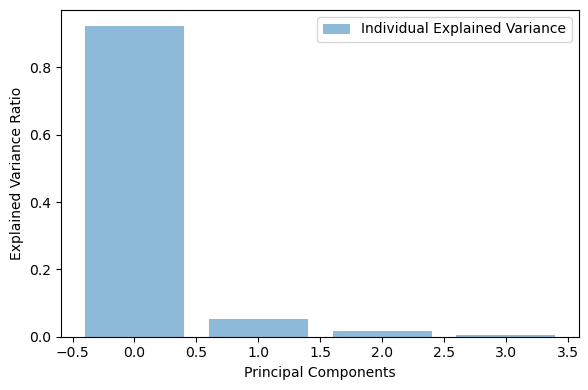

In [10]:
plt.figure(figsize =(6,4))
plt.bar(range(4), explained_variance, alpha=0.5, label ="Individual Explained Variance")
plt.ylabel("Explained Variance Ratio")
plt.xlabel("Principal Components")
plt.legend(loc = "best")
plt.tight_layout()

In [11]:
pca = PCA(n_components = 3)
x_new = pca.fit_transform(iris.drop(['Species','Id'], axis = 1))
x_new[:5]

array([[-2.68420713,  0.32660731, -0.02151184],
       [-2.71539062, -0.16955685, -0.20352143],
       [-2.88981954, -0.13734561,  0.02470924],
       [-2.7464372 , -0.31112432,  0.03767198],
       [-2.72859298,  0.33392456,  0.0962297 ]])

In [12]:
category_num ={"Species":{"setosa":0,"versicolor":1,"virginica":2}}
iris_ = iris.replace(category_num)
columns = list(iris.columns[:4])

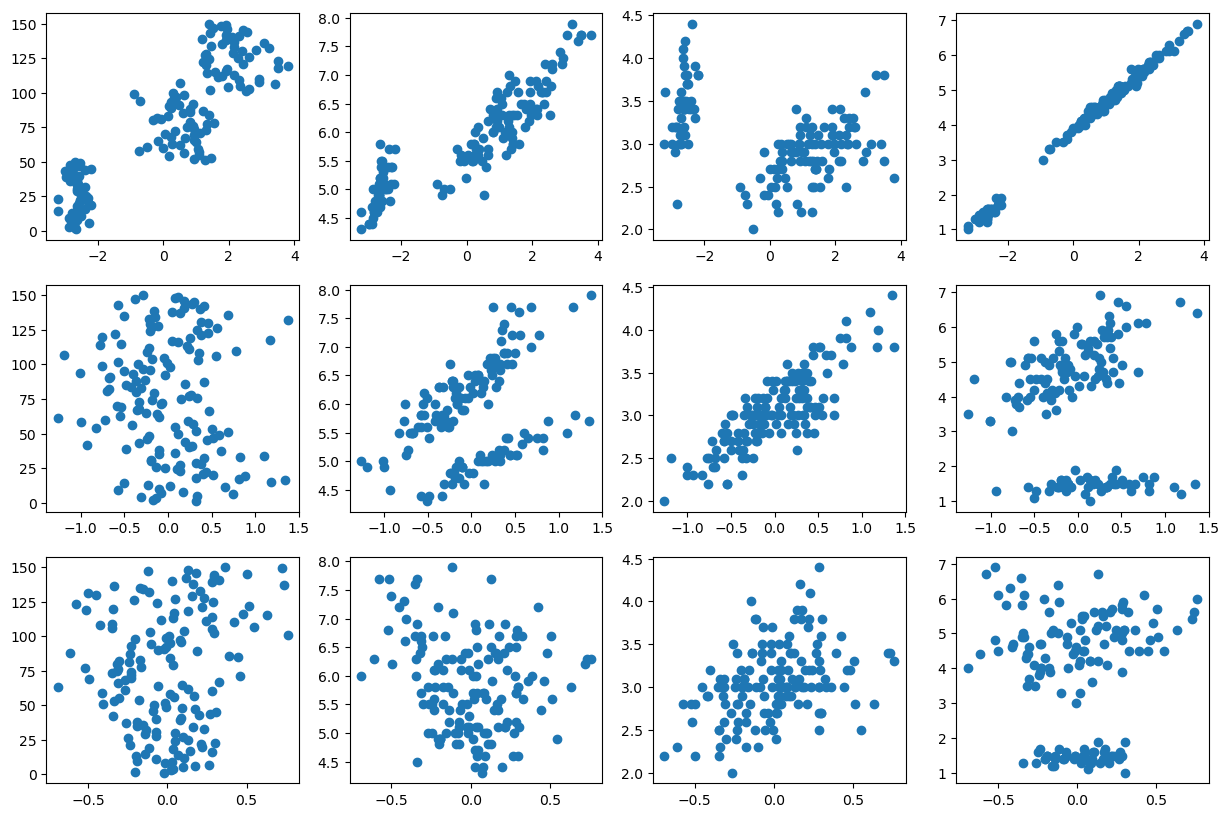

In [14]:
fig, axes = plt.subplots(3,4,figsize =(15,10))
k = 0
for i in range(axes.shape[0]):
    for j in range(axes.shape[1]):
        axes[i,j].scatter(x_new[:,i],iris[columns[j]])
plt.show()